Oppimispäiväkirja Tijo.222<br> 
Elias Kukkanen<br> 
Opn: H291625<br> 

# Oppimispäiväkirja

##### Oppimistavoitteet

Datan merkitys on korostunut paljon viimeaikoina niin koulun penkillä kuin työelämässäkin. Olen käynyt muutamia datan kanssa työskentelyyn liittyviä kursseja, kuten Basic to data analytics, mutta niissä opit ovat jäänet todella pintapuolisiksi. Olen kuullut, että Python on suuresti käytetty työkalu datan kanssa työskennellessä, joten sen kaytön oppiminen datatyökalujen kanssa kiinnostaa erittäin paljon. Haluaisin oppia kurssilla, miten dataa voidaan hyödyntää organisaatioden toiminnan tukena, jotta tulevaisuudessa pystyisin käyttämään opittuja taitojani työelämässä.

### Luento 1: Mitä on datatiede

Oppimispäiväkirjan esimmäisen luennon tektiosio on tehty esimmäisen luennon pohjalta. Itse en osallistununt opetukseen, vaan se on laadittu [annetun materiaalin pohjalta](https://github.com/InfoTUNI/joda2022/blob/master/luentomuistio/luento01.ipynb). 

Datatiede rakentuu neljän kokoaisuuden varaan: viestintä ja visualisointi, tilastollinen analyysi, ohjelmointi sekä tietokannat ja liiketoiminta. Kun nämä neljä asiaa yhdistää, tulee aivan mieleen se, mitä tietojohtamisen opinnot pitävät sisällään, tai ainakin minun. 

Datan määrä on valtava ja se kasvaa kokoajan. Se mahdollistaa organisaatioissa monia asioita, esimerkiksi tekoälyn kehittämistä, mutta ei ole kuitenkaan itsestään selvyys, että sen avulla saataisiin luotua kilpailuetua. Pelkästään datan kerääminen ei tuota organisaatioissa mitään muuta kuin lisää työtä. Jotain tälle datalle tulisi myös tehdä. 

Datatietelijän rooli organisaatioissa on moninainen, niin kun luennolla sanotaan. Datatieteen pohjautuminen neljän eri kokonaisuuden varaan on tälle varmasti merkittävä syy. Keskeistä datatieteilijöille on kuitenkin kyky hallinoida sekä muokata suuria määriä dataa ja hyödyntää ohjelmointia eri tavoin. Kun etsii duunitorista työpaikkoja tittelillä data scientist, niin pystyy huomaamaan, kuinka paljon paikkoja erilaisissa organisaatioissa data tieteilijöille on olemassa. Michael Palmeri sanojen mukaan data on uusi öljy, ja sen pystyy jo pelkästään huomaamaan yhdellä duunitorin haulla. 

Datatieteen parissa voi törmätä erilaisiin prosesseihin ja malleihin. Esimerkiksi CRISP-DM -malli kuvaa avoimen strandardin prosessikuvausta datatieteen prosessista. Kyseinen prosessi käynnistyy liiketoiminnan ymmärtämisestä ja siihen liittyy mukaan myös datan ymmärtäminen. Data ymmäträmistä voidaan hyödyntää liiketoiminnan ymmäträmiseen ja samaa toimii myös toisinpäin. Liiketoiminnan ymmärtämistä voi helpottaa jo aikaisemmin mallinnettu ja arvioitu data. Kun näistä on saatu hyvä kuva, voidaa siirtyä datan preparointiin, jonka jälkeen sitä voidaan alkaa mallintaa. Mallinuksesta voidaan vielä joutua takaisin repartointiin, jos mallinnusvaiheessa huomataan epäkohtia. Kun data on saatu mallinnetua ja sitä pystyy muutkin kuin datatieteiljät lukemaan, se arvioidaan. Viimeisenä sitä käytetään liiketoiminnan päätöksenteon tukena.

Microsoftin tiimidatatiedemalli kuvaa datatiedeprojektia. Mallin vaiheet aika samalaisia kuin CRISP-M -mallissa, mutta siinä on käyty tarkemmin datan- mallinnusta sekä hankintaa. Nämä vaiheet ovat datatieteilijöille ehkä ne työllistävimät vaiheet, jossa pääsee oikeasti työskentelemään datan kanssa. 

5 Oivallusta
- Datatiede koostuu 4 eri kokonaisuudesta
- Datatiede voidaan hyödyntää monipuolisesti organisaatioissa
- Etiikka tulee huomioida datan kanssa työskennellessä
- Python on noussut vaikuttavaksi datatyökaluksi
- Datatiede tärkeä osa tietojohtamisen osaamisessa

Kehityskohdat
- Ensimmäisellä viikolla tulee paljon uusi työkaluja, joten voisi olla hyvä jokin tutoriaali, minkä avulla pääsee alkuun ohjelmien kanssa. 

Seuraavat Python harjoitukset perustuvat [Visual Studio Coden Data Science in VS Code tutorialiin](https://code.visualstudio.com/docs/datascience/data-science-tutorial), sekä luennon ja koodiklinikan aineistoon. 
Käytetty data on saatavilla seuraavasta linkistä: [Titanic Data](https://www.openml.org/d/40945).

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [162]:
#ipmorting test data, cab be found above from the link: Titanic Data
data_original = pd.read_csv('test_data.csv')
data_modified = data_original.copy()

In [163]:
print(data_modified.dtypes)

pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object


In [164]:
# Replacing "?" with Nan value
data_modified.replace('?',np.nan, inplace= True)

# Changing male and female to value
data_modified.replace({'male': 1, 'female': 0}, inplace=True)

# Changing age and fare types to float64
data_modified = data_modified.astype({"age": np.float64, "fare": np.float64})

In [165]:
print(data_modified.dtypes)

pclass         int64
survived       int64
name          object
sex            int64
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object


In [166]:
# Creating a function that capitalises objects
caps = lambda x: x.upper()

# Capitalising names
data_modified['name'] = data_modified['name'].apply(caps)

In [167]:
# Making new column "relatives" and making the value 1 if sibsp or parch is greater than zero
data_modified['relatives'] = data_modified.apply(lambda y: int((y['sibsp'] + y['parch']) > 0), axis = 1)

In [168]:
#printing rows that have relatives
print(data_modified[data_modified['relatives'] == 1])

      pclass  survived                                             name  sex  \
1          1         1                   ALLISON, MASTER. HUDSON TREVOR    1   
2          1         0                     ALLISON, MISS. HELEN LORAINE    0   
3          1         0             ALLISON, MR. HUDSON JOSHUA CREIGHTON    1   
4          1         0  ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS)    0   
6          1         1                ANDREWS, MISS. KORNELIA THEODOSIA    0   
...      ...       ...                                              ...  ...   
1290       3         1                 WILKES, MRS. JAMES (ELLEN NEEDS)    0   
1299       3         0                              YASBECK, MR. ANTONI    1   
1300       3         1          YASBECK, MRS. ANTONI (SELINI ALEXANDER)    0   
1304       3         0                             ZABOUR, MISS. HILENI    0   
1305       3         0                            ZABOUR, MISS. THAMINE    0   

          age  sibsp  parch  ticket    

In [169]:
# Selecting all the ten years olds
ten_years_olds = data_modified.loc[:,['age', 'sex']]
ten_years_olds = ten_years_olds[ten_years_olds['age'] == 10]

# Seleceting all the 20 years olds
twenty_years_olds = data_modified.loc[:,['age', 'sex']]
twenty_years_olds = twenty_years_olds[twenty_years_olds['age'] == 20]

# Summing up ten and 20 years olds 
sum_tenyo = sum(ten_years_olds['age'])/10
sum_twentyuo =  sum(twenty_years_olds['age'])/20

print(sum_tenyo)
print(sum_twentyuo)

4.0
23.0


<AxesSubplot:>

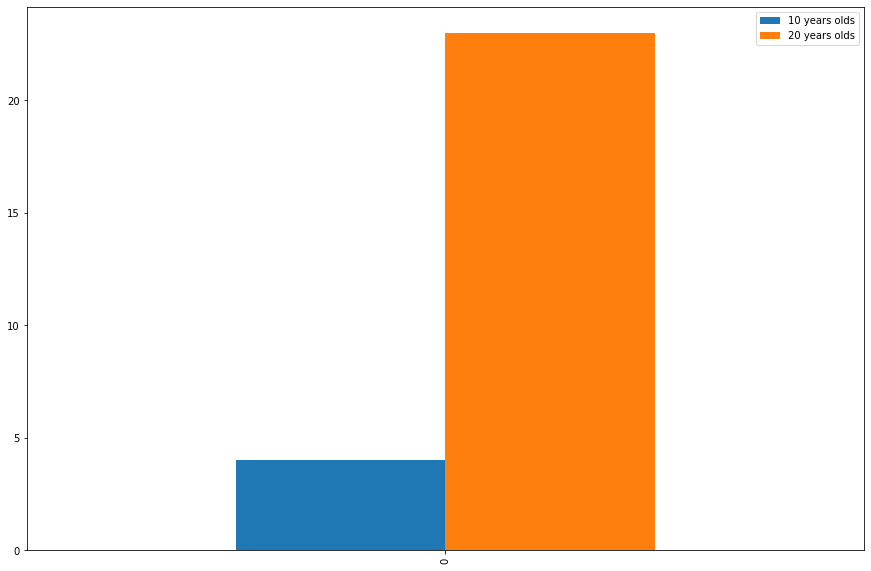

In [171]:
# Plotting the results

data_modified_plot = pd.DataFrame([[sum_tenyo, sum_twentyuo]])
# Creating a new dataframe for the plot
data_modified_plot.columns = ["10 years olds", "20 years olds"]

data_modified_plot.plot.bar(figsize=(15,10))

# Luento 2: Data

Viikon 2 oppimipäivänkirjan kappale pohjautuu luentoviikon luentoon sekä sen materiaaliin. Osallistuin itse live luennolle. 

Dataa on saatavilla yhä enemmän ja enemmän. Organisaatiot ovat alkaneet ymmärtämään datan hyödyntömisen ja kilpailukyvyn saavuttamisen korrelaation, jonka seurauksena sitä ollaan alettu hyödyntää yhe enemmän. Data-analytiikka helpottaa liiketoimintaprosessin ymmärtämistä ja analytiikka voidaan jakaa nelikenttään, joka jaetaan seuraaviin teemoihin: kuvaileva analytiikka, diagnosoiva analytiikka, ennakoiva analytiikka ja ohjaava analytiikka. Kuvailevassa analytiikassa analytiikan avulla pyritään selittämään mitä on tapahtunut. Tässä kyse on muuttujien tunnistamisesta sekä mallintamisesta tuottaen kuvaa siitä, mitä prosessissa tapahtuu. Diagnoisoivassa analytiikassa tutkitaan sitä, miksi jotain on tapahtunut. Siinä kuvaillaan dataa, jotta voidaan löydää perusteluja, miksi jotain on tapahtunut. Ennakoivassa analytiikassa pyritään ennekoimaan analytiikan avulla tulevaa. Siinä hyödynnetään aikasarja- aineistonjen mallintamista tulevaisuuteen. Ohjaavassa analytiikassa pyritään löytämään vastaus kysymykseen, mitä asialle pitäii tehdä. Se on esimerkiksi sitä, että analysoidaan jotain tämänhetkistä prosessia ja pyritään analyyisn avulla optimoimaan kysistä prosessia tehokkaammaksi. 

##### Ryömijät ja Raapijat
Ryömiä käy systemaattisesti läpi verkko-osoitteita tarkoituksena yleensä sivun indekstointi. Ryömijä kasvattaa hakuavaruuttaan lisäämällä aloituspisteestä löytyvien verkkosivujen hyperlinkit omaan hakujonoon. Ryömijää kontrolloidaan rajoittamalla läpikäytäviä sivuja, milloin se palaa takaisin jo vierailulle sivulle, ylikuormituksen estäminen käytävillä sivuilla ja toiminnan koordinoinnilla. Raapija on työkalu, joka kerää automatisoidusti tietoa verkkosivuilta. Käytännön toteuksissa ryömijä ja raapija on yhdistetty, jolloin ryömijä luo hakuavaruuden lisäämällä hyperlinkkejä hakujonoon ja raapija kerää näistä tietoa parametrien avulla. 

Kun dataa ollaan kerätty, esimerkiksi ryömijöiden ja raapijoiden avulla, sitä täytyy jalostaa. Se tulisi saada sellaiseen muotoon, että se on helposti ymmärrettävää ja henkilöt, jotka sitä tarvitsevat, pystyvät lukemaan sitä. Tätä kutsutaan datan jalostamiseksi. 

5 Oivallusta
- Määrällä ei korvata laatua
- Datan jalostus tärkeää ja työlästä
- Ryömijät ja raapijat yhdessä kätevä tapa kerätä dataa
- Data on iso kilpailukyvyn tekijä organisaatioissa tänäpäivänä
- Dataan keräämisessä saattaa tulla lait jossain kohtaa vastaan

Kehityskohdat
-  Yksinkertainen ryömijä/raapija esimerkki, missä kaikki turha koodi jätetty pois

In [1]:
import scrapy


class WikikoiraSpider(scrapy.Spider):
    name = 'wikikoira'
    allowed_domains = ['fi.wikipedia.org']
    start_urls = ['http://fi.wikipedia.org/']

    def parse(self, response):
        filename = 'response.html'

        with open(filename, 'wb') as f:
            f.write(response.body)

scrapy strartproject "name"
scrapy genspider <url>
scrapy crawl "crawler name"

### Luento 3

Viikon 3 oppismispäiväkirja pohjautuu viikon 3 luentomateriaaliin, itse en osallistunut liveopetukseen.

#### Koneoppiminen

Koneoppiminen on ohjelmiston kehittymistä tehokkaammaaksi tiedon sekä käyttäjän toimijen pohjalta. Koneoppimisalgritmejä on eri tyyppisiä: ohjattu, ohjaamaton ja vahvistettu oppiminen. 

Ohjattu oppiminen algoritmimia käytetään yleisesti ennustavassa mallinuksessa. Se on käytännössä sitä, että oppimisdatan pohjalta kone ennustaa tulevan arvon, esimerkiksi lineaarien regression avulla. Ohjattu oppiminen algoritmi yrittää mallintaa suhteita ja riippuvuuksia mikä on opittu aiemmasta datasta. Ohjattu oppiminen algoritmin päätyypit ovat luokittelu algoritmit ja regressioalgoritmit. Luokittelualgoritmissä opitun datan avulla arvioidaan annettua dataa sekä luokitellaan se. Regressioalgoritmissa ennustetaan arvo erilaisten ominaisuuksien avulla. Jotta tämä olisi mahdolista, algoritmi rakentaa malliperusteisia ominaisuuksia oppimisdatan pohjalta. ([Morgun Ivan 2015](https://en.proft.me/2015/12/24/types-machine-learning-algorithms/))

Ohjaamaton oppiminen algoritmia käytetään pääsääntöisesti mallien havaitsemiseen ja kuvaavaan mallinnukseen. 




